# Bank churn binary prediciton
kaggle: https://www.kaggle.com/competitions/playground-series-s4e1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
print(f'there are {df_train.shape[0]} rows in the training set and {df_test.shape[0]} rows in the training set')
print(f'last ID number in the train set is {df_train["id"].max()}, the first id number in the test set is {df_test["id"].min()}')

there are 165034 rows in the training set and 110023 rows in the training set
last ID number in the train set is 165033, the first id number in the test set is 165034


### Column descriptions:

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)


In [5]:
# Looking for missing values
df_train.notna().all().all(), df_test.notna().all().all()

(True, True)

Luckily, we arent faced with any missing values in our training set or our our test set.

### Looking at class balance

Percentage of positive labels in the train dataset: 78.84%


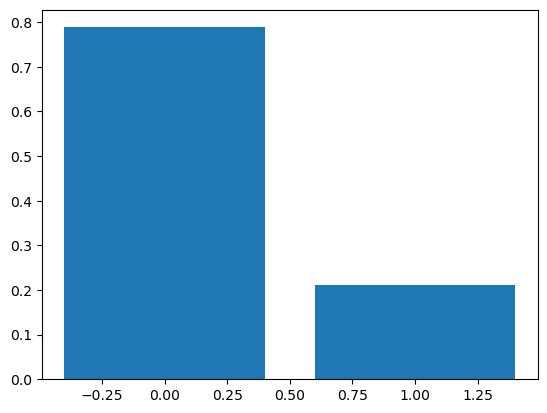

In [6]:
plt.bar(df_train['Exited'].value_counts().index, df_train['Exited'].value_counts().values/df_train.shape[0])
print(f'Percentage of positive labels in the train dataset: {df_train["Exited"].value_counts().values[0]/df_train.shape[0]*100 :.2f}%')

This class is unbalanced at about 4:1 so we may want to resample later.

## Data pre-processing

In [7]:
# Get categorical columns
cat_cols = df_train.select_dtypes(include='object').columns
# Get numerical columns
num_cols = df_train.select_dtypes(exclude='object').columns

In [8]:
print(f'number of unique values in each categorical column:\n{df_train[cat_cols].nunique()}')

number of unique values in each categorical column:
Surname      2797
Geography       3
Gender          2
dtype: int64


In [9]:
# Geography and gender are hold very few unique values so we can one-hot encode them
# The rest of the categorical columns hold many unique values so we will use label encoding


# Drop the original Geography column and add the new one-hot encoded columns

df_train = pd.concat([df_train.drop('Geography', axis=1), pd.get_dummies(df_train['Geography'], prefix='Geography', drop_first=True)], axis=1)
df_test = pd.concat([df_test.drop('Geography', axis=1), pd.get_dummies(df_test['Geography'], prefix='Geography', drop_first=True)], axis=1)

# Drop the gender column and add the new one-hot encoded column

df_train = pd.concat([df_train.drop('Gender', axis=1), pd.get_dummies(df_train['Gender'], prefix='Gender', drop_first=True)], axis=1)
df_test = pd.concat([df_test.drop('Gender', axis=1), pd.get_dummies(df_test['Gender'], prefix='Gender', drop_first=True)], axis=1)

df_train


,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,True
2,2,15694510,Hsueh,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,True
3,3,15741417,Kao,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True
4,4,15766172,Chiemenam,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,False,True,False
165030,165030,15665521,Okechukwu,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,False,False,True
165031,165031,15664752,Hsia,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,False,False,True
165032,165032,15689614,Hsiung,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,False,True,False


### Introducing a transaction count per customerID column

In [10]:
print(f'The number of unique customer IDs is {df_train["CustomerId"].nunique()}')
# join the two arrays on similar customer Ids: left join. for the training set we will use the target variable as the right array
df_train.join(df_train['CustomerId'].value_counts(), on='CustomerId', how='left', rsuffix='transaction_count')
df_train.rename(columns={'count': 'CustomerIdTransactionCount'}, inplace=True)

# join the two arrays on similar customer Ids: left join. for the test set we will use the target variable as the right array
df_test.join(df_train['CustomerId'].value_counts(), on='CustomerId', how='left', rsuffix='transaction_count')
df_test.rename(columns={'count': 'CustomerIdTransactionCount'}, inplace=True)

The number of unique customer IDs is 23221


### Frequency encoding surname
We'll also frequency encode surname to retain that information from the surname column

In [11]:
# Frequency encoding surname
surname_freq = df_train['Surname'].value_counts()
df_train['Surname'] = df_train['Surname'].map(surname_freq)
df_test['Surname'] = df_test['Surname'].map(surname_freq)


### Examining the relationship betweeen customerID and surname.

In [12]:
print(f"{len(df_train[df_train['CustomerId']==15674932]['Surname'].unique())} unqiue surnames for CustomerId 15674932")
df_train[df_train['CustomerId']==15674932]['Surname'].value_counts(), 

29 unqiue surnames for CustomerId 15674932


(Surname
 115     5
 261     1
 46      1
 553     1
 1199    1
 645     1
 108     1
 632     1
 5       1
 319     1
 194     1
 74      1
 56      1
 398     1
 627     1
 1306    1
 443     1
 36      1
 81      1
 740     1
 717     1
 524     1
 2456    1
 25      1
 191     1
 33      1
 69      1
 754     1
 1577    1
 Name: count, dtype: int64,)

Here we can see that the customer ID is not in fact unique to a single customer, or even a single customer per geographic location and gender. This could mean that a single customer ID may encompass multiple individuals, potentially within a single company.

We also have however that entries with the same Customer ID can exit differnently, this may reduce the significance of customer ID when informing predicitons.

### Target encoding for customer id and surname 

As CustomerId and Surname are high cardinality categorical variables, we can target encode them to make them easier for any form of predicitng algorithm to understand. We'll do a simple mean target encoding here.

In [13]:
# Target encoding for Surname
freqs = df_train.groupby(['Surname']).size()

# Global mean of Exited column:
global_mean = df_train['Exited'].mean()
print('global_mean',global_mean)

# Mean per Surname
means = df_train.groupby(['Surname']).Exited.mean()
means.head(10)

# Creating new encoded features for surname - Target (mean) encoding
for df in [df_train, df_test]:
    df['manual_Surname_mean'] = df['Surname'].map(means)
    df['manual_Surname_mean'].fillna(global_mean, inplace=True)




global_mean 0.21159882206090866


In [14]:
# Target encoding for CustomerId
freqs = df_train.groupby(['CustomerId']).size()

# Global mean of Exited column:
global_mean = df_train['Exited'].mean()

# Mean per CustomerId
means = df_train.groupby(['CustomerId']).Exited.mean()

# Creating new encoded features for CustomerId - Target (mean) encoding
for df in [df_train, df_test]:
    df['manual_CustomerId_mean'] = df['CustomerId'].map(means)
    df['manual_CustomerId_mean'].fillna(global_mean, inplace=True)


## EDA

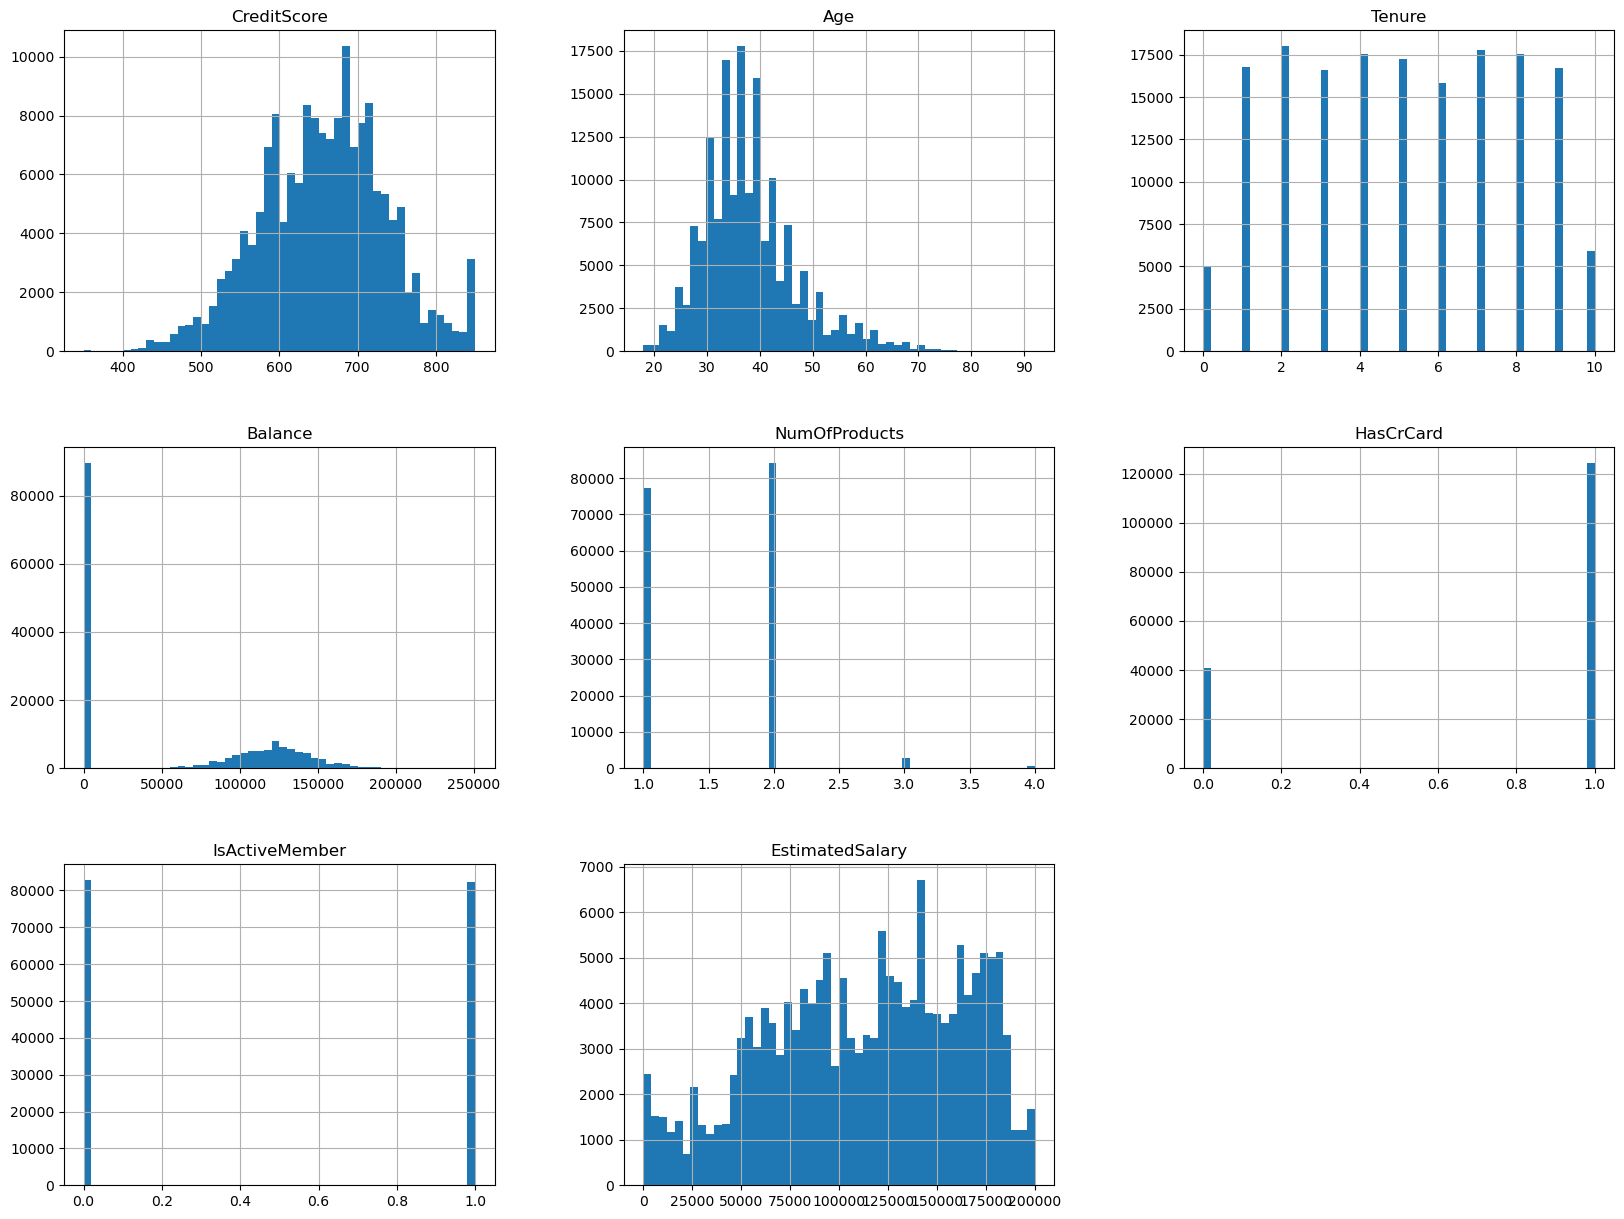

In [15]:
# Looking at the distribution of the numerical variables

df_train[num_cols].drop(['Exited', 'id', 'CustomerId'],axis=1).hist(bins=50, figsize=(20, 15))
plt.show()


We can see the distribution of the different variables. Some are 

In [16]:
# Create a has_balance column to encode the empirical fact that about half of the customers don't have a balance
df_train['has_balance'] = df_train['Balance'] > 0
df_train['has_balance'].value_counts()

# Performing this on the test set as well
df_test['has_balance'] = df_test['Balance'] > 0
df_test['has_balance'].value_counts()

has_balance
False    59885
True     50138
Name: count, dtype: int64

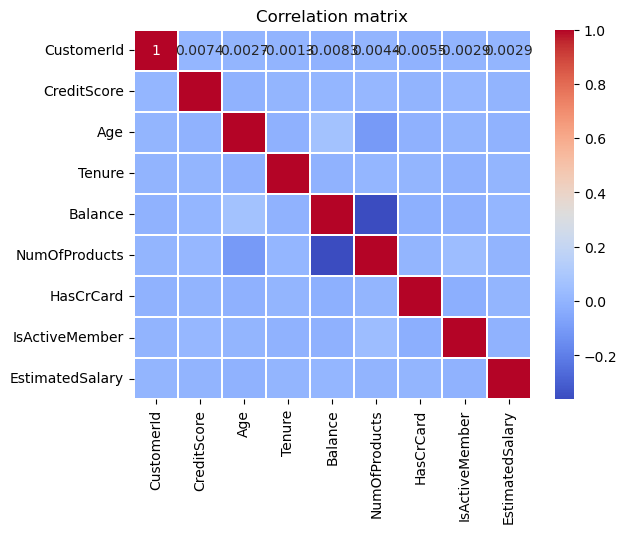

In [17]:
# Looking at how the numerical variables correlate to our target variable.


# Create correlation matrix heatmap


corr = df_train[num_cols].drop(['Exited', 'id'],axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()
# Set title
plt.title('Correlation matrix')
plt.show()


As we can see, the correlation of 

### Reducing skew on the age and credit score distributions

We use a box-cox transformation to make the curves more normal

In [18]:
from scipy.stats import boxcox

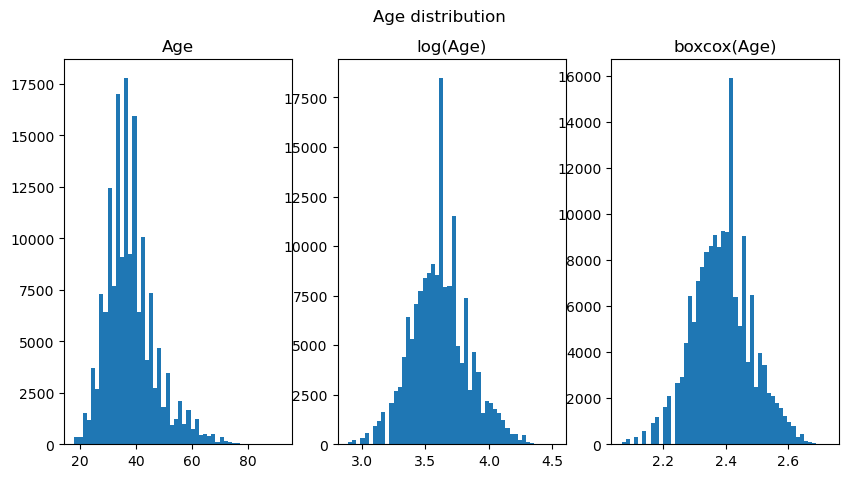

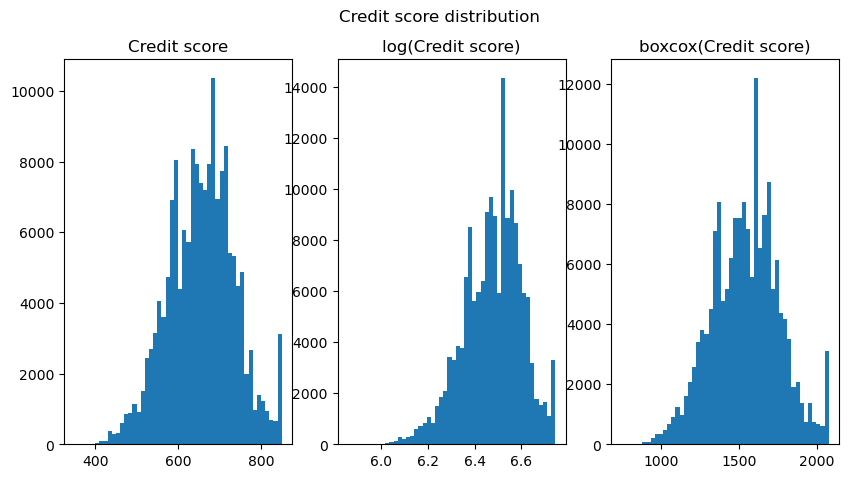

In [19]:


# Plot the three histograms for age, log(age) and boxcox(age)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

fig.suptitle('Age distribution')

ax[0].hist(df_train['Age'], bins=50)
ax[0].set_title('Age')
# x-> log(x) can reduce skew
ax[1].hist(np.log(df_train['Age']), bins=50)
ax[1].set_title('log(Age)')

# the boxcox scipy method introduces a coefficient lambda x -> log(labmda x)
ax[2].hist(boxcox(df_train['Age'])[0], bins=50)
ax[2].set_title('boxcox(Age)')
plt.show()

# Create a new column with the boxcox of the age
df_train['Age_boxcox'], lambda_age = boxcox(df_train['Age'])
df_train.drop('Age', axis=1, inplace=True)


# Plot the three histograms for credit score, log(credit score) and boxcox(credit score)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

fig.suptitle('Credit score distribution')

ax[0].hist(df_train['CreditScore'], bins=50)
ax[0].set_title('Credit score')
# x-> log(x) can reduce skew
ax[1].hist(np.log(df_train['CreditScore']), bins=50)
ax[1].set_title('log(Credit score)')
# the boxcox scipy method introduces a coefficient lambda x -> log(labmda x)
ax[2].hist(boxcox(df_train['CreditScore'])[0], bins=50)
ax[2].set_title('boxcox(Credit score)')

plt.show()

# Create a new column with the boxcox of the credit score
df_train['CreditScore_boxcox'], lambda_credit = boxcox(df_train['CreditScore'])
df_train.drop('CreditScore', axis=1, inplace=True)



We can see that the boxcox and the log function reduces skew quite nicely in age, but performs worse on credit score. Boxcox performs better in the first case and seems to improve the normality of the distribution a little in the credit score case, but not significantly.

### Now we compare the box-cox transformed train data with the similarly transformed test data

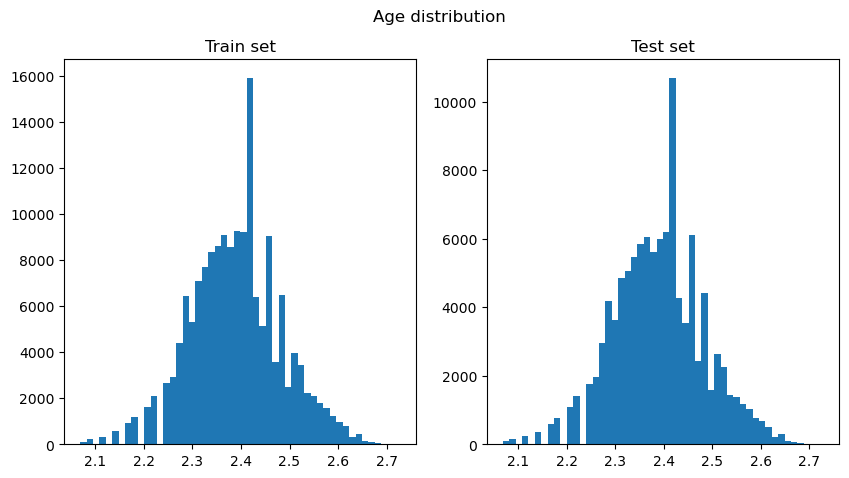

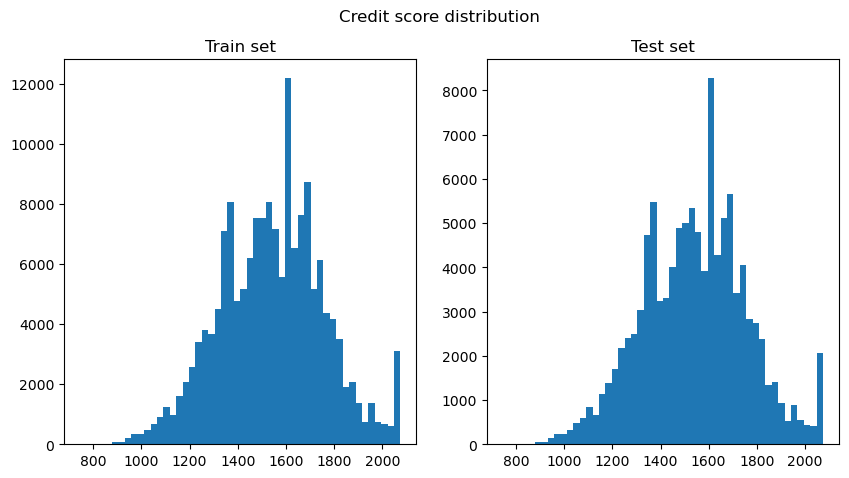

In [20]:
# apply the same transformations to the test set
df_test['Age_boxcox'] = boxcox(df_test['Age'], lambda_age)

df_test['CreditScore_boxcox'] = boxcox(df_test['CreditScore'], lambda_credit)

df_test.drop(['Age', 'CreditScore'], axis=1, inplace=True)

# Plot the train and test histograms for age against each other

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Age distribution')

ax[0].hist(df_train['Age_boxcox'], bins=50)
ax[0].set_title('Train set')
ax[1].hist(df_test['Age_boxcox'], bins=50)
ax[1].set_title('Test set')
plt.show()

# Plot the train and test histograms for credit score against each other

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Credit score distribution')

ax[0].hist(df_train['CreditScore_boxcox'], bins=50)
ax[0].set_title('Train set')
ax[1].hist(df_test['CreditScore_boxcox'], bins=50)
ax[1].set_title('Test set')
plt.show()








In [21]:
print(df_test['CreditScore_boxcox'].mean() - df_train['CreditScore_boxcox'].mean())

df_train['CreditScore_boxcox'].head(), df_test['CreditScore_boxcox'].head()

0.21786926970935383


(0    1571.378923
 1    1460.593760
 2    1598.561007
 3    1337.619767
 4    1702.408683
 Name: CreditScore_boxcox, dtype: float64,
 0    1350.916228
 1    1612.175212
 2    1538.842885
 3    1606.727687
 4    1801.575548
 Name: CreditScore_boxcox, dtype: float64)

These distributions are uncannily similar, and I had to double check that I wasn't just re-plotting the same graph, but it appears that the distributions from which the training and test sets were taken are just extremely well matched. This makes sense as we are working with synthetic data.

In [22]:
# Looking at our new dataset:

# Checking that our two datasets have the same columns

set(df_train.columns) - set(df_test.columns), set(df_test.columns) - set(df_train.columns)


({'Exited'}, set())

In [23]:
# Checking that out datasets have no categorical columns

df_train.select_dtypes(include='object').columns, df_test.select_dtypes(include='object').columns

(Index([], dtype='object'), Index([], dtype='object'))

In [24]:
# Dropping encoded and extra columns
df_train.drop(['Surname', 'CustomerId', 'id'], axis=1, inplace=True)
df_test.drop(['Surname', 'CustomerId', 'id'], axis=1, inplace=True)

In [25]:
df_train

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,manual_Surname_mean,manual_CustomerId_mean,has_balance,Age_boxcox,CreditScore_boxcox
0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True,0.318008,0.303030,False,2.344982,1571.378923
1,1,0.00,2,1.0,1.0,49503.50,0,False,False,True,0.273333,0.117647,False,2.344982,1460.593760
2,10,0.00,2,1.0,0.0,184866.69,0,False,False,True,0.222052,0.225806,False,2.424469,1598.561007
3,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True,0.206405,0.125000,True,2.357565,1337.619767
4,5,0.00,2,1.0,1.0,15068.83,0,False,True,True,0.146341,0.074074,False,2.344982,1702.408683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,2,0.00,1,1.0,1.0,131834.75,0,False,True,False,0.207692,0.315789,False,2.344982,1568.664135
165030,3,0.00,1,0.0,0.0,131834.45,0,False,False,True,0.217252,0.138889,False,2.369695,1912.618180
165031,5,0.00,1,1.0,1.0,127429.56,0,False,False,True,0.209283,0.266667,False,2.318328,1295.189739
165032,7,161533.00,1,0.0,1.0,71173.03,0,False,True,False,0.229757,0.153846,True,2.304185,1266.125640


# Model creation

We will attempt to predict chrun with the following three models:

- Logistic Regression
- K-Nearest Neighbours
- Random forest classifier
- Support Vector machines


For hyperparameter tuning, we will cross validate on the training set. Then we will evaluate performance of the models on the test set.

In [26]:
# Create data pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [27]:
# Create X_train, y_train and X_test
X_train = df_train.drop(['Exited'], axis=1).to_numpy()
y_train = df_train['Exited'].to_numpy()
X_test = df_test.to_numpy()

### Importing models

In [28]:
# Import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Hyperparameter tuning

We perform 5-fold cross validation on the training set

In [29]:
# Import necessary libaries

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Create a pipeline for the KNN model

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Create a pipeline for the Logistic Regression model

logreg_pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])

# Create a pipeline for the Random Forest model

rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

# Create a pipeline for the SVM model   

svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

# Create a dictionary of pipelines

pipelines = {'knn': knn_pipe, 'logreg': logreg_pipe, 'rf': rf_pipe, 'svm': svm_pipe}

# Create a dictionary of the hyperparameters

params = {'knn': {'knn__n_neighbors': [3, 5, 7, 9, 11]},
            'logreg': {'logreg__C': [0.1, 1, 10, 100]},
            'rf': {'rf__n_estimators': [10, 50, 100], 'rf__max_depth': [None, 5, 10]},
            'svm': {'svm__C': [0.1, 1, 10]}}

In [30]:
# Cross validate the models

for name, pipeline in pipelines.items():
    print(f'Cross validating {name} pipeline')
    grid_search = GridSearchCV(pipeline, params[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    print(f'Best score: {grid_search.best_score_}')
    print(f'Best parameters: {grid_search.best_params_}')
    # Save the best model
    pipelines[name] = grid_search.best_estimator_


Cross validating knn pipeline
Best score: 0.8876951050857722
Best parameters: {'knn__n_neighbors': 11}
Cross validating logreg pipeline
Best score: 0.8711378369098608
Best parameters: {'logreg__C': 0.1}
Cross validating rf pipeline
Best score: 0.9182671648871477
Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 100}
Cross validating svm pipeline


In [ ]:
# Cross validating svm pipeline


print(f'Cross validating svm pipeline')
grid_search = GridSearchCV(svm_pipe, params['svm'], cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')
# Save the best model
pipelines['svm'] = grid_search.best_estimator_

Cross validating svm pipeline


Cross validating knn pipeline|
Best score: 0.884229429974831|
Best parameters: {'knn__n_neighbors': 11}

### Finding classification probabilities for final output:

Each model needs to output the probability with which it would classify a datapoint for our final output. Some of the models give this naturally, others require more nuanced appraoches. 

Logistic Regression: A classic model for binary classification that naturally provides probability estimates.

Support Vector Machines (SVM): SVMs can be used for binary classification and can provide probability estimates through methods like Platt scaling.

Decision Trees and Random Forests: Decision trees and ensemble methods like random forests can output probabilities based on the fraction of trees in the ensemble that predict a particular class.

Platt scaling involves training a logistic regression model using the SVM's decision values as input features and the true labels as the target variable.
We then use this logistic regression model to predict probabilities for the unseen data (`X_test`)


In [ ]:
# Create RF models with optimal parameters

knn_model = KNeighborsClassifier(n_neighbors=11)


# Fit the model to the training data

knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
'''
# Logistic regression:
logreg_model.predict_proba(X_test)

# Decision trees:
tree_model.predict_proba(X_test)

# Support vector machines (platt caling):


from sklearn.calibration import CalibratedClassifierCV


# Wrap the SVM classifier with CalibratedClassifierCV for Platt scaling
platt_svm = CalibratedClassifierCV(base_estimator=svm_classifier, method='sigmoid', cv='prefit')

# Train the Platt-scaled SVM on the training data
platt_svm.fit(X_train, y_train)

# Obtain calibrated probabilities on the test data
calibrated_probs = platt_svm.predict_proba(X_test)

'''


predictions = knn_model.predict_proba(X_test)

# Return the probability of the positive class
predictions[:, 1]


array([0.18181818, 0.18181818, 0.        , ..., 0.27272727, 0.36363636,
       0.09090909])

In [ ]:
# Create a dataframe with ID and predicitons

df_submission = pd.DataFrame({'id': df_test['id'], 'Exited': predictions[:, 1]})
df_submission.head()

df_submission.to_csv('Data/submission.csv', index=False)